# Fremont Bridge - Bicycle Counts - Number of bikes that cross the bridge 
## From exploratory analysis to reproducible science
### Sergio Iván López Rodríguez

   * In this document, I will carry out the analysis of the number of people who pass through the Fremont Bridge by bike. I will determine the variants of the days as well as the two entrances of the bridge by East and West. The database will be obtained from the Official Seattle page and I will make all the modifications to prepare the DateFrame and to be able to locate the existing patterns.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

# url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv('../Data/Fremont_Bridge.csv', index_col='Date', parse_dates=True)
data

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2019-10-31 19:00:00,111.0,44.0,67.0
2019-10-31 20:00:00,52.0,17.0,35.0
2019-10-31 21:00:00,41.0,16.0,25.0


   * We can see that some patterns are found over the years. You can think of a hypothesis in the decrease during the end and beginning of the year.

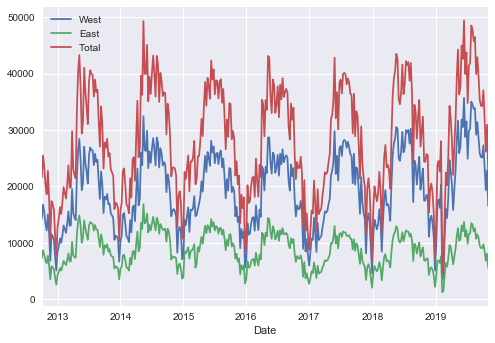

In [46]:
plt.style.use('seaborn')
data.columns = ['West', 'East', 'Total']
data.resample('W').sum().plot();

   * Here we can identify that there is a difference when graphing per day.

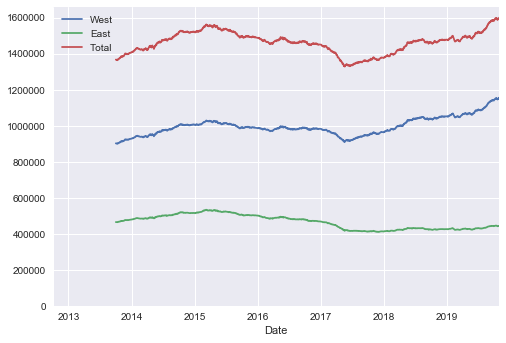

In [42]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None);

   * Now with this we can identify the hours in which people are spending more fluently.
   * Identifying and assuming that the hours are when they travel to or from work and school.

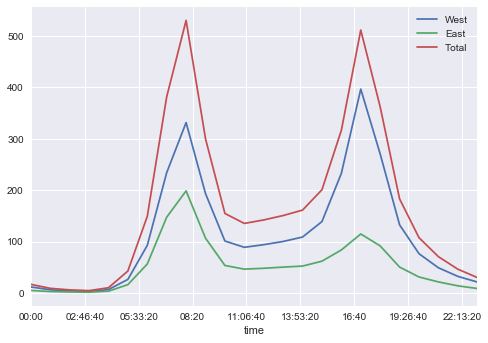

In [49]:
data.groupby(data.index.time).mean().plot()
plt.show()

   * Being a bit rough in this next graph we can quickly determine the growth over the years in the population flow.
   * We can assume that it may be due to population growth but it would be a hypothesis and of which we will cover in other research and I will attach these updated data.

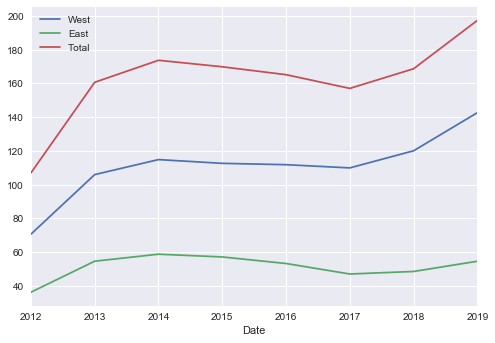

In [50]:
data.groupby(data.index.year).mean().plot();

   * For the following table, we determine the time and date to determine the total number of people using the bridge per day, with specific hours during all years on average.

In [51]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,17.0,25.0,15.0,23.0,17.0
01:00:00,14.0,6.0,12.0,25.0,29.0
02:00:00,3.0,12.0,11.0,16.0,5.0
03:00:00,7.0,3.0,6.0,4.0,10.0
04:00:00,13.0,15.0,16.0,9.0,4.0


   * With the previous table, I go to graph each day of the year represents a line in the plot, so we can identify that on weekdays we have two major uses of the bridge by the population, and the less highlighted parts below that can be seen They are holidays and weekends.

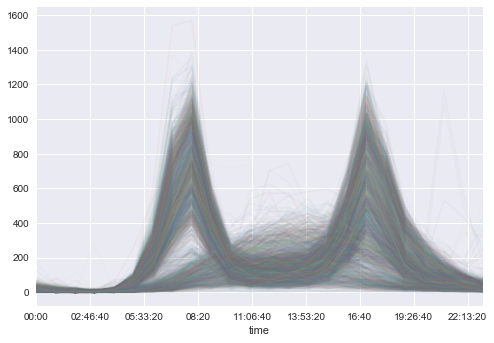

In [52]:
pivoted.plot(legend=False, alpha=0.04);

### With this I give as finished this small demonstration of obtaining, cleaning, handling, data ploting.
#### With information so you can know people's patterns, product prices, make statistical predictions, companies plan events at strategic points as well as many other things.
